# Program Disertatie

In [6]:
#Import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsap
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import seaborn as sns

## Panel Data Generation


In [8]:
def generare_date_panel(N, T):
   
    # Generăm variabilele X1 și X2
    X1 = np.random.normal(3, 2, N*T)
    X2 = np.random.normal(36, 25, N*T)
    
    # Generăm efectele aleatoare individuale
    alpha = np.random.normal(0, 1, N)

    # Generăm erorile
    epsilon = np.random.normal(0, 1, N*T)

    # Inițializăm coeficienții Beta
    B1 = 3
    B2 = 7

    # Generăm Y cu efecte aleatoare
    Y = B1*X1 + B2*X2 + alpha.repeat(T) + epsilon

    # Cream panelul folosind pandas DataFrame
    data = pd.DataFrame({'id': np.repeat(np.arange(N), T),
                         'time': np.tile(np.arange(T), N),
                         'Y': Y,
                         'X1': X1,
                         'X2': X2})

    return data


### PooledOLS

In [9]:
def PooledOLS():
    global beta1_array, beta2_array
    Y = df_panel.iloc[:,2]
    X = df_panel.iloc[:,3:]

    pooled_olsr_model = sm.OLS(Y, sm.add_constant(X))    
    pooled_olsr_model_results = pooled_olsr_model.fit()
    
    # Extragerea coeficientilor beta1 si beta2
    beta1 = pooled_olsr_model_results.params[1]  # Beta 1 coefficient
    beta2 = pooled_olsr_model_results.params[2]  # Beta 2 coefficient
    
    #Adaugam coeficientii la array-uri
    beta1_array = np.append(beta1_array,beta1)
    beta2_array = np.append(beta2_array,beta2)

##### Formatare date obtinute in tabele

In [10]:
def tableData(data):
    global N_values,T_values
    
    # Impartim datele in cate N-uri avem
    arrays = np.split(data, len(N_values))

    # Concatenam datele vertical
    combined_array = np.vstack(arrays)

    # Creem nemele coloanelor in functie de T
    column_names = ['T=' + str(t) for t in T_values]

    # Transformam vectorul combinat intr-un pandas dataFrame
    df = pd.DataFrame(combined_array, columns=column_names)

    # Adaugam o noua prima coloana cu variatia N-ului
    df.insert(0, 'N\T', ['N=' + str(n) for n in N_values])

    return df

#### Generare grafice cu datele din tabele

In [14]:
def plot_line_plots(data):
    # Extragere date din tabel
    plot_data = data.iloc[:, 1:].values
    row_names = data.iloc[:, 0].values

    # Setam figura si axele
    fig, ax = plt.subplots()

    # Iteram fiecare rand din date
    for i in range(len(plot_data)):
        x = np.arange(len(plot_data[i]))  # x-axis values
        y = plot_data[i]  # y-axis values

        # Plotul
        ax.plot(x, y, label=row_names[i])

    # Setam etichetele pentru axa x
    x_labels = data.columns[1:]
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_xticklabels(x_labels)

    # Mutam legenda inafara plotului
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Setam etichetele acelor si titlul
    ax.set_xlabel('Perioade de timp')
    ax.set_ylabel('')
    ax.set_title('')

    # Ajustam layoutul
    fig.tight_layout(rect=[0, 0, 0.85, 1])

    # Afisare
    plt.show()

# Main Program

Beta1 mediu: 

    N\T       T=5      T=15      T=20      T=30      T=40      T=50      T=60  \
0   N=5  3.016804  2.998605  3.000256  3.000904  2.997228  2.997516  2.996624   
1  N=15  3.006046  3.005389  2.999140  3.002125  2.999674  3.001802  3.000364   
2  N=20  3.013065  2.995047  2.996631  3.001193  3.002986  3.001710  3.000106   

       T=70      T=80      T=90     T=100     T=110     T=120     T=130  \
0  2.998709  3.003734  3.004639  2.997253  2.998755  2.996792  2.999880   
1  2.998386  2.999343  3.000688  3.000473  3.000978  2.999950  2.999923   
2  3.001858  3.000924  2.999654  3.000484  3.000735  2.999530  2.997190   

      T=140     T=150     T=160     T=170     T=180  
0  2.998115  2.996118  3.000473  3.000797  3.000589  
1  2.998467  2.999464  2.999725  3.000521  2.997644  
2  2.999083  2.997488  2.999996  2.999072  2.999428  
Beta2 mediu: 
     N\T       T=5      T=15      T=20      T=30      T=40      T=50      T=60  \
0   N=5  7.000066  6.999927  6.999758  6.999885

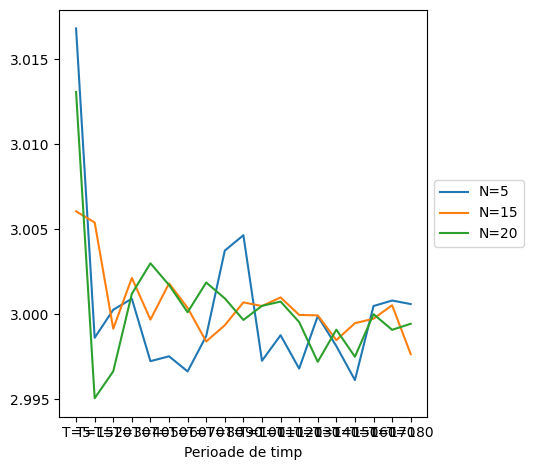

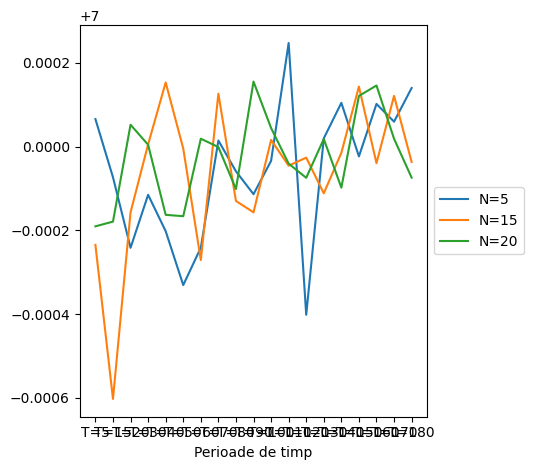

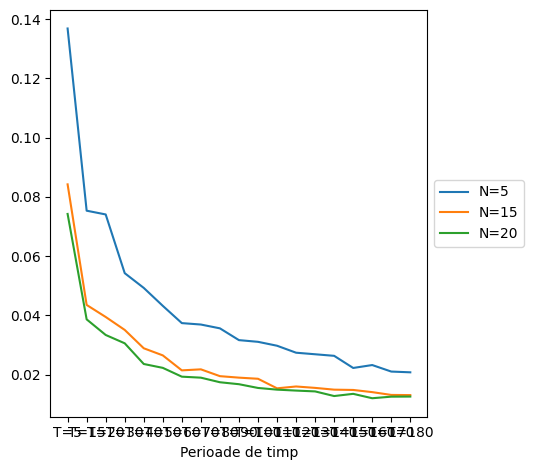

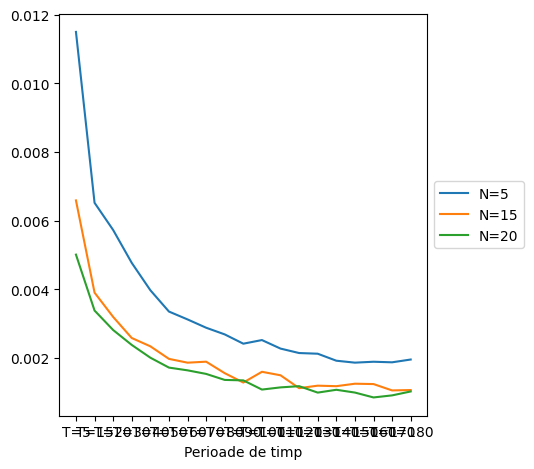

In [15]:
## Monte Carlo Generations

# Setam seed-ul pentru a putea reproduce rezultatele
#np.random.seed(123)

# Definim parametri
N_values = [5, 15, 20]  # number of individuals
T_values = [5, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]  # time periods for each panel
beta = np.array([0.5, 0.7])  # coefficients
sigma_u = 1.5  # random effects standard deviation
sigma_e = 2.5  # error term standard deviation


#Vectori cu toate valorile urmate simularilor monte carlo
mean_beta1_general = np.array([])
mean_beta2_general = np.array([])
std_deviation_beta1_general = np.array([])
std_deviation_beta2_general = np.array([])

#Loop over individual values
for N in N_values:
    # Loop over time period values
    for T in T_values:
        
        # Vectori cu valorile lui Beta1, Beta2 (Beta0?)
        beta1_array = np.array([])
        beta2_array = np.array([])
        
        # Create panel for each time period value
        for i in range(200):
        
            # Generate panel data for each individual
            df_panel = generare_date_panel(N, T)

            #PooledOLS (extrag beta-urile intr-un vector global)
            PooledOLS()
            #Fixed Effects(extrag beta-urile intr-un vector global)
        
        
        #Calculez media si standard deviation pentru Beta
        mean_value_beta1 = np.mean(beta1_array)
        mean_value_beta2 = np.mean(beta2_array)
        std_deviation_beta1 = np.std(beta1_array)
        std_deviation_beta2 = np.std(beta2_array)
        #Salvez valorile in liste/ arrays globale
        mean_beta1_general = np.append(mean_beta1_general,mean_value_beta1)
        mean_beta2_general = np.append(mean_beta2_general,mean_value_beta2)
        std_deviation_beta1_general = np.append(std_deviation_beta1_general,std_deviation_beta1)
        std_deviation_beta2_general = np.append(std_deviation_beta2_general,std_deviation_beta2)

#Rezultate PooledOLS        
mean_beta1 = tableData(mean_beta1_general)
print("Beta1 mediu: \n")
print( mean_beta1)
mean_beta2 = tableData(mean_beta2_general)
print("Beta2 mediu: \n", mean_beta2)
std_beta1 = tableData(std_deviation_beta1_general)
print("Deviatia standard Beta1: \n", std_beta1)
std_beta2 = tableData(std_deviation_beta2_general)
print("Deviatia standard Beta2: \n", std_beta2)

#Grafice
#Ploturi
plot_line_plots(mean_beta1)
plot_line_plots(mean_beta2)
plot_line_plots(std_beta1)
plot_line_plots(std_beta2)